In [1]:
"""
Uses a dataset to do train/test but uses ANOTHER dataset as test.

test_size=0.1 (same model metrics as for 0.15)so that train size is a large as possible as this is a routine that does not load in an existing model...TO DO.

Scaler does not seem to make a difference and can be turned on or off.

"""

'\nUses a dataset to do train/test but uses ANOTHER dataset as test.\n\ntest_size=0.1 (same model metrics as for 0.15)so that train size is a large as possible as this is a routine that does not load in an existing model...TO DO.\n\nScaler does not seem to make a difference and can be turned on or off.\n\n'

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import AdaBoostClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split


from sklearn.metrics import classification_report,accuracy_score,confusion_matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

ModuleNotFoundError: No module named 'scipy'

In [ ]:
SPLIT = 0.175

In [ ]:
df = pd.read_csv("./datasets/reduced_features_mlr_datasets/KEEP_RED_MLR_BEST_f2f88ce7-7be6-47c6-abce-e1a2697ac866.csv")

In [ ]:
df.head()

,ZBTB38,EIF5B,LOC157381,LOC641746,NOXO1,NOX3,C11orf87,TXLNB,C16orf3,CACNA1B,...,INADL,PNPT1,C9orf78,FLJ30679,INO80,MLF1,PCM1,RTKN,LOC100133050,target
0,3.167523,3.819321,0.000000,0.262866,0.819806,0.000000,0.721388,0.425510,1.449070,3.981971,...,1.564539,3.148278,4.544430,0.075259,2.924718,2.276985,4.394596,2.680102,0.243213,True
1,3.641662,3.745280,0.000000,0.000000,1.103652,0.000000,0.577353,0.147442,1.779066,4.275640,...,1.546457,2.956609,4.410836,0.087020,2.675513,2.212196,3.964750,0.951060,0.193554,False
2,2.961247,4.139911,0.000000,0.000000,0.263718,0.000000,1.336409,0.470296,1.187343,4.228973,...,1.183893,3.276218,4.121438,0.125302,2.651672,2.167136,4.395419,2.545437,0.389720,False
3,3.386636,3.837247,0.026751,0.000000,0.655745,0.118068,1.077735,0.243218,1.356347,4.186374,...,1.194144,2.758751,4.323276,0.234647,2.604788,2.437555,4.126378,1.915747,0.085250,False
4,2.638785,4.166145,0.015109,0.000000,0.672023,0.054314,0.169101,1.547479,1.928037,4.313928,...,0.546185,3.340376,4.298790,0.056205,2.523191,2.052520,4.085484,2.678899,0.000000,True


<AxesSubplot: xlabel='target', ylabel='count'>

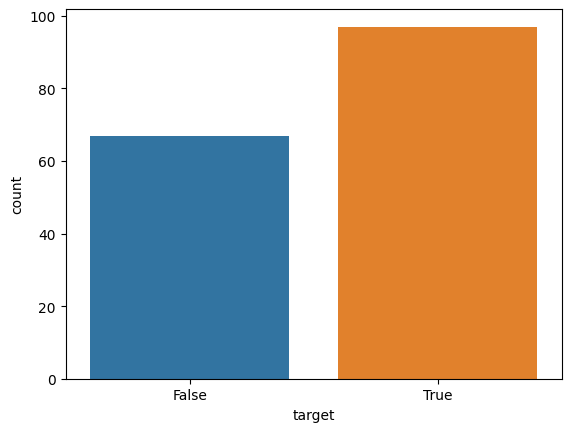

In [ ]:
sns.countplot(data=df,x='target')

In [ ]:
#  ensure OTHER has same shape and features - done over next few cells
mlr_cols = df.columns.tolist()
# mlr_cols
OTHER_DATASET = './datasets/other.csv'
other_dataset = pd.read_csv(OTHER_DATASET,low_memory=False)
other_dataset_actual = other_dataset['target']
# other_dataset = other_dataset.drop(['target'], axis=1)
# Ensure OTHER has same set of coulmns
other_dataset = other_dataset[mlr_cols]
other_dataset

,ZBTB38,EIF5B,LOC157381,LOC641746,NOXO1,NOX3,C11orf87,TXLNB,C16orf3,CACNA1B,...,INADL,PNPT1,C9orf78,FLJ30679,INO80,MLF1,PCM1,RTKN,LOC100133050,target
0,3.615216,3.795653,0.017993,0.127209,0.401645,0.259869,1.045716,0.235404,0.994035,3.127488,...,1.139971,3.245879,4.694440,0.09083,2.749453,4.522866,5.129600,3.698152,0.354255,True
1,2.550637,3.664415,0.017993,0.127209,0.460724,0.000000,0.130793,0.222359,0.994035,2.471427,...,1.139971,2.771562,5.085314,0.09083,2.356403,3.055102,5.138749,2.790566,0.354255,True
2,3.301822,4.588571,0.017993,0.127209,0.465418,0.037100,0.428774,0.180348,0.994035,3.142982,...,1.139971,2.837368,4.986607,0.09083,2.722558,3.602326,5.765487,2.102950,0.354255,True
3,2.274956,4.049195,0.017993,0.127209,0.249461,0.072956,0.150267,0.357581,0.994035,3.134538,...,1.139971,3.129634,5.632187,0.09083,2.498458,4.320535,5.331394,3.944474,0.354255,True
4,3.982117,3.534709,0.017993,0.127209,0.151022,0.000000,0.081272,0.382199,0.994035,2.350664,...,1.139971,2.652117,4.670835,0.09083,2.845540,3.583603,4.686831,1.898990,0.354255,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118,3.282917,4.281357,0.017993,0.127209,0.460422,0.081586,0.668056,0.086730,0.994035,3.520611,...,1.139971,3.320527,4.646888,0.09083,3.642898,3.387034,6.570513,2.718020,0.354255,False
119,3.356769,4.389732,0.017993,0.127209,0.053705,0.502590,0.093509,0.076469,0.994035,4.138315,...,1.139971,3.359979,4.032806,0.09083,3.212031,3.228649,5.909807,2.769943,0.354255,True
120,3.194065,4.105410,0.017993,0.127209,0.345594,0.000000,0.339767,0.163224,0.994035,3.495746,...,1.139971,3.735241,4.645206,0.09083,3.160086,3.395833,5.629260,3.634465,0.354255,True
121,2.837711,4.483906,0.017993,0.127209,0.225065,0.007882,0.456674,1.003250,0.994035,3.009523,...,1.139971,4.150657,4.905847,0.09083,3.523223,3.098185,5.951646,3.409334,0.354255,True


In [ ]:
# other_dataset_actual

In [ ]:
other_dataset = other_dataset.drop(['target'], axis=1)
other_dataset
other_dataset.shape

(123, 48)

MODEL

In [ ]:
# Model evaluation
X = df.drop('target',axis=1)
y = df['target']
X.shape


(164, 48)

In [ ]:
#  verify cols are same shape
other_dataset.shape[1] == X.shape[1]



True

In [ ]:
#  Model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=SPLIT, random_state=101)
#  0.1, 0.15 gives 0.88, 0.2 gives 0.66

In [ ]:
scaler = StandardScaler()
# scaling does not seem to affect results

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
other_dataset = scaler.transform(other_dataset)


In [ ]:
model = AdaBoostClassifier(algorithm='SAMME.R', base_estimator='deprecated', learning_rate=1.0,n_estimators=50, random_state=1113)


In [ ]:
model.fit(X_train,y_train)

AdaBoostClassifier(random_state=1113)

In [ ]:
predictions = model.predict(X_test)

In [ ]:
predictions

array([ True, False,  True, False,  True,  True,  True, False,  True,
       False,  True, False,  True,  True,  True,  True, False,  True,
        True, False,  True,  True, False, False,  True, False,  True,
       False, False])

In [ ]:
df_predictions =  pd.DataFrame(predictions)
df_predictions.rename({0:'pred'}, axis=1, inplace=True)
# df_predictions

In [ ]:
df_y_test = pd.DataFrame(y_test)
df_y_test.rename({'target':'actual'}, axis=1, inplace=True)
# df_y_test

In [ ]:

# Combine two df with different indexes
df_preds=pd.concat([df_y_test,df_predictions],axis=0)
df_preds
df_results= pd.concat([df_y_test.reset_index(drop=True), df_predictions.reset_index(drop=True)], axis=1)
df_results['correct'] = df_results['actual'] == df_results['pred']
df_results['correct'] = df_results['correct'].replace({True: 'YES', False: 'NO'})
# df_results


Evaluate MODEL

In [ ]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

       False       0.83      0.83      0.83        12
        True       0.88      0.88      0.88        17

    accuracy                           0.86        29
   macro avg       0.86      0.86      0.86        29
weighted avg       0.86      0.86      0.86        29



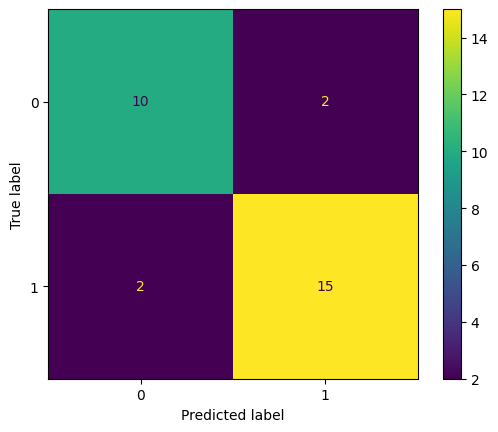

In [ ]:
cm = confusion_matrix(y_test, predictions, )
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

Evaluation of predictions for OTHER

In [ ]:
predictions = model.predict(other_dataset)
predictions

array([ True,  True,  True,  True,  True,  True,  True, False,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True, False,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True, False, False,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True])

In [ ]:
print(classification_report(other_dataset_actual,predictions))

              precision    recall  f1-score   support

       False       0.50      0.03      0.06        61
        True       0.50      0.97      0.66        62

    accuracy                           0.50       123
   macro avg       0.50      0.50      0.36       123
weighted avg       0.50      0.50      0.36       123



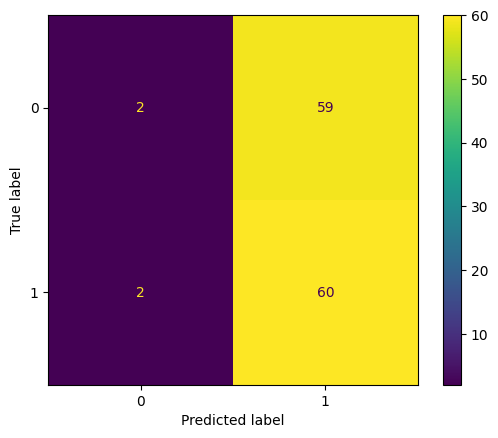

In [ ]:
cm = confusion_matrix(other_dataset_actual, predictions, )
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()